# Minor Project Exam: Exploratory Data Analysis (EDA) 

### Problem statement:
Perform exploratory data analysis (EDA) on the given dataset using Python libraries such as Numpy, Pandas, and Matplotlib/Seaborn. The goal is to uncover underlying patterns, relationships, and insights from the data. 

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations. 


In [13]:
import numpy as np
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats 

%matplotlib inline


### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [16]:
df= pd.read_csv('car_dekho.csv')

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [18]:
df.shape

(301, 9)

#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [20]:
print('First rows:',df.head())
print('last few rows:',df.tail())

First rows:   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
last few rows:     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          

### Section 2: Initial Data Examination

In [22]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [26]:
num =  df.select_dtypes(include='number').columns
print("numeric features:")
print(num)

numeric features:
Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


In [27]:
catergorical_features=['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
for column in  catergorical_features:
    df[column]=df[column].astype('category')

df.dtypes

Car_Name         category
Year                int64
Selling_Price     float64
Present_Price     float64
Kms_Driven          int64
Fuel_Type        category
Seller_Type      category
Transmission     category
Owner               int64
dtype: object

In [28]:
cf=  df.select_dtypes(exclude='number').columns
print("numeric features:")
print(cf)

numeric features:
Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [30]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### 2.4 Provide detailed comments that explain your understanding of the data.

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [34]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [36]:
 dupli= df.duplicated().sum()

In [37]:
df[df.duplicated]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [38]:
df.drop_duplicates(inplace=True)


In [39]:
df.reset_index(drop=True,inplace=True)

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

In [42]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [43]:
num_columns= df.select_dtypes(include=['int64','float64'])

In [44]:
outlier = []
for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3-Q1
    df= df[(df[column]<Q1-1.5*IQR)|(df[column]>Q3-1.5*IQR)]
    print(f"Number of Outliers in {column}:{len(outlier)}")
 #df = df.drop(outlier.index,inplace=True)

Number of Outliers in Year:0
Number of Outliers in Selling_Price:0
Number of Outliers in Present_Price:0
Number of Outliers in Kms_Driven:0
Number of Outliers in Owner:0


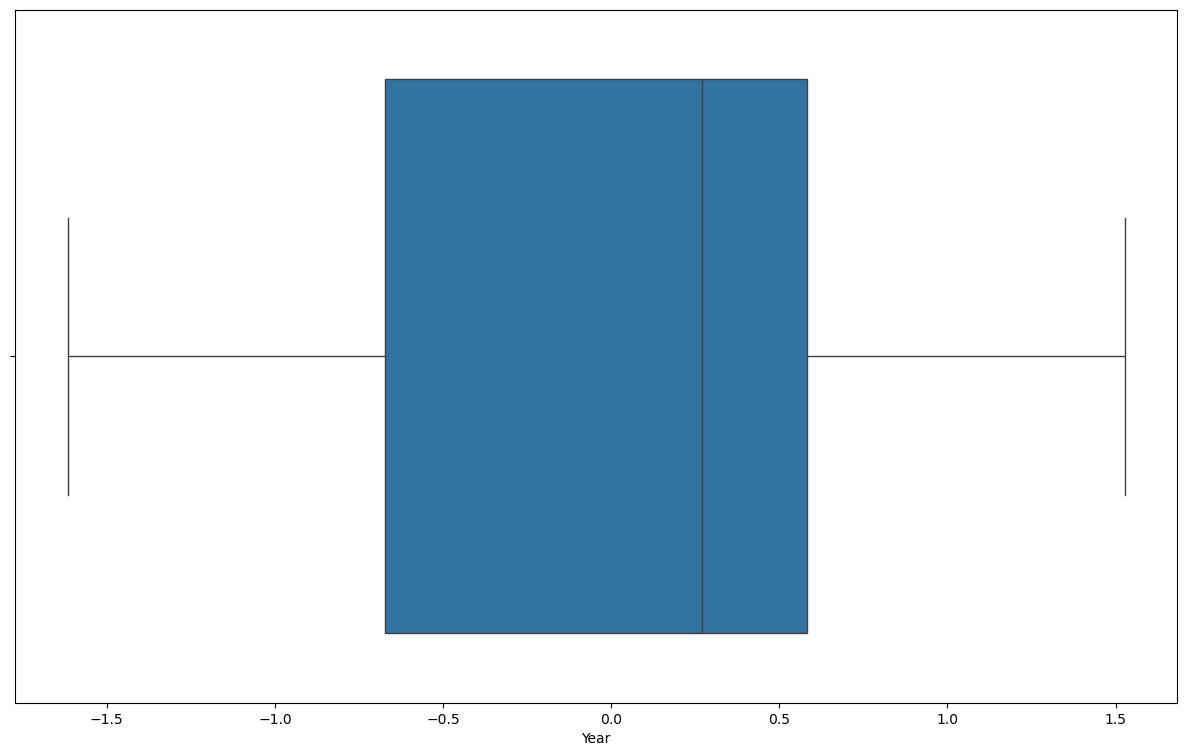

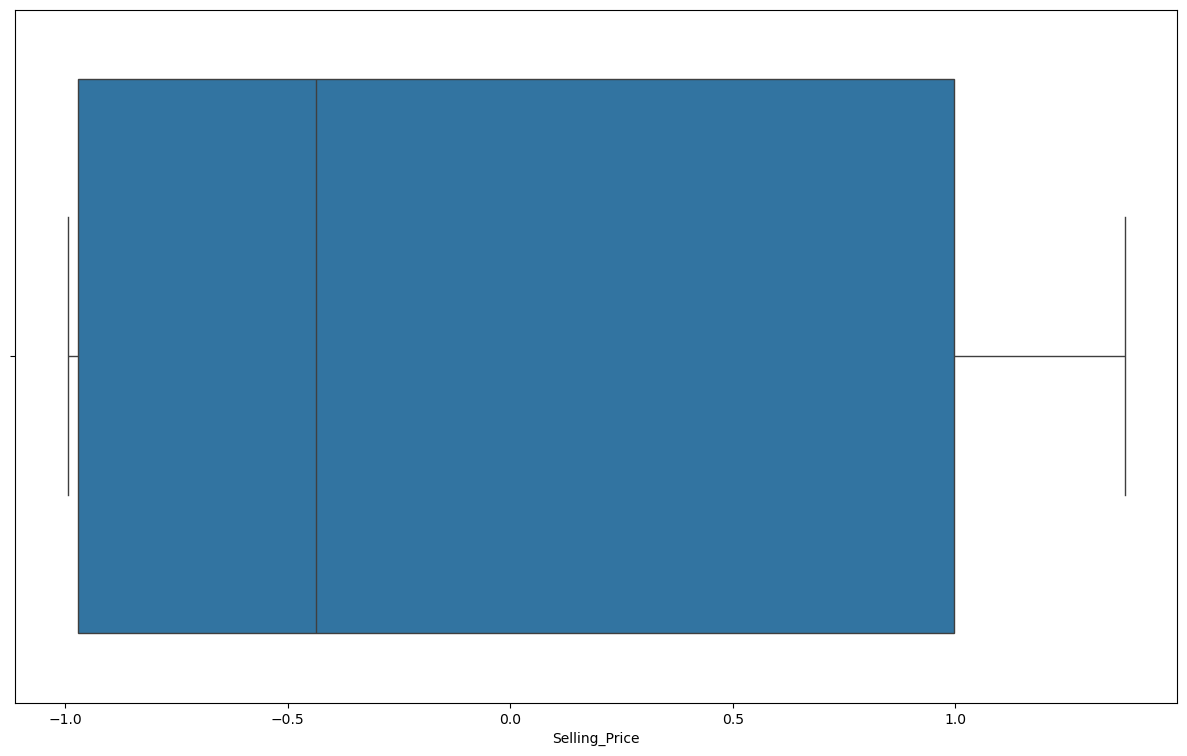

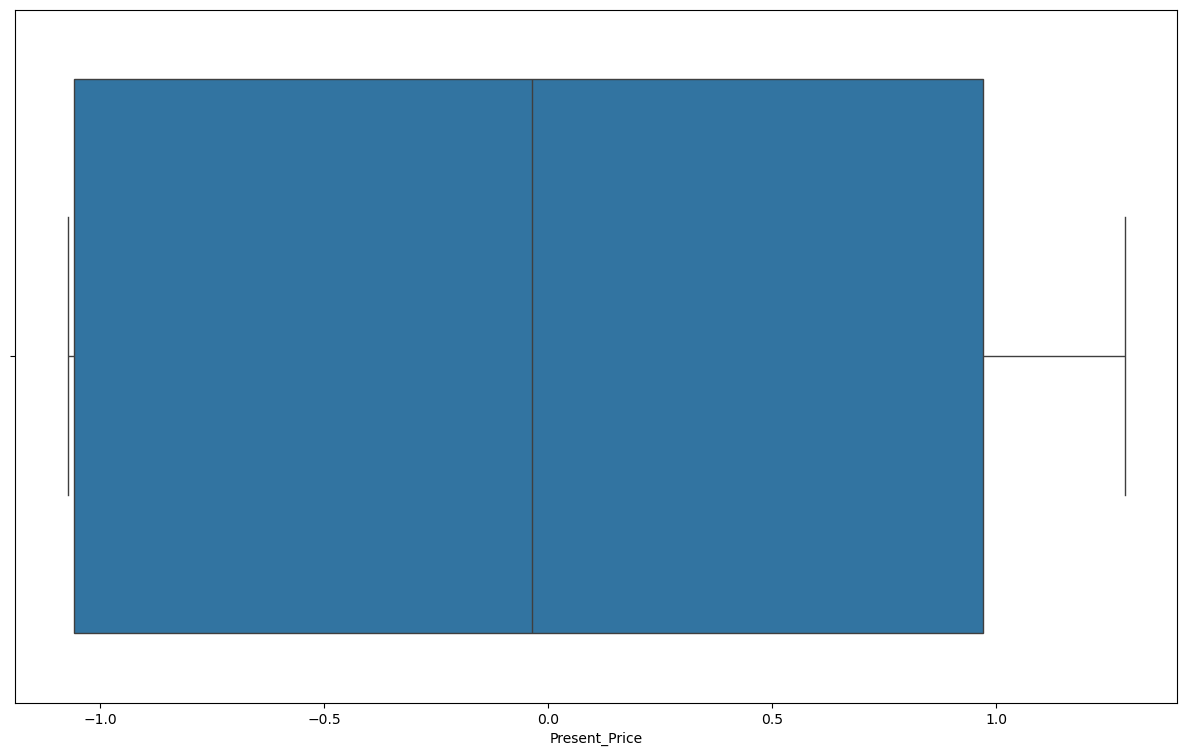

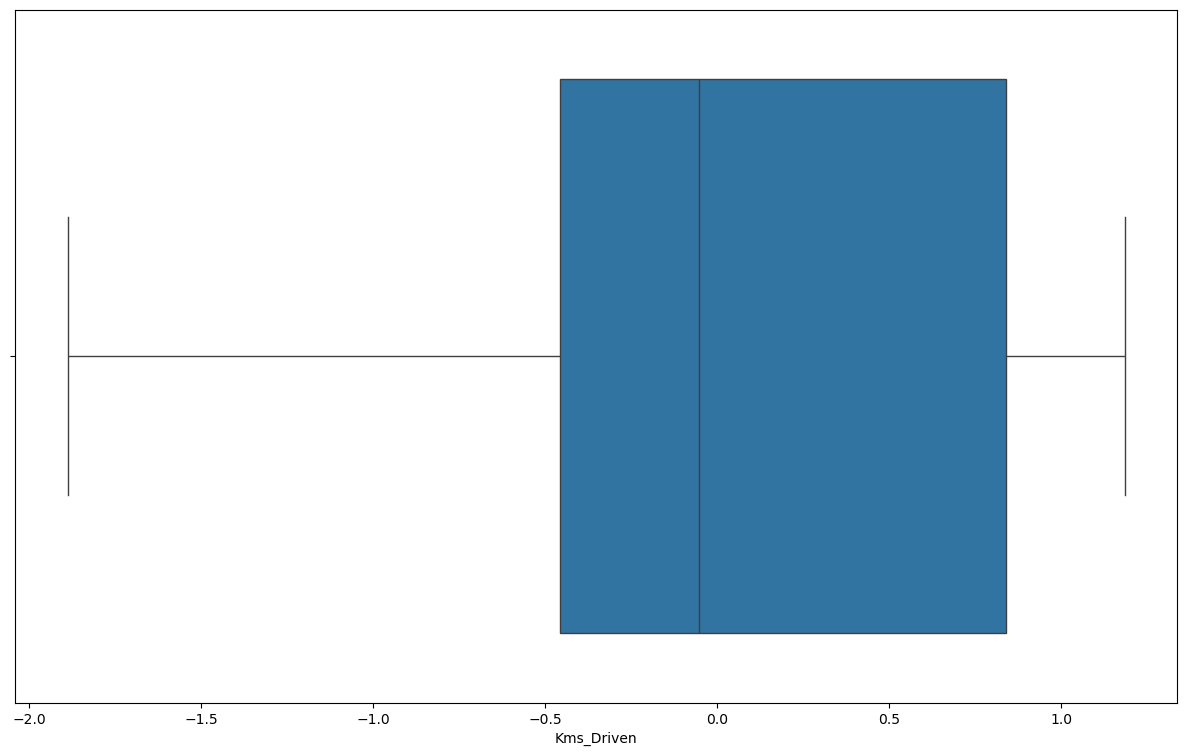

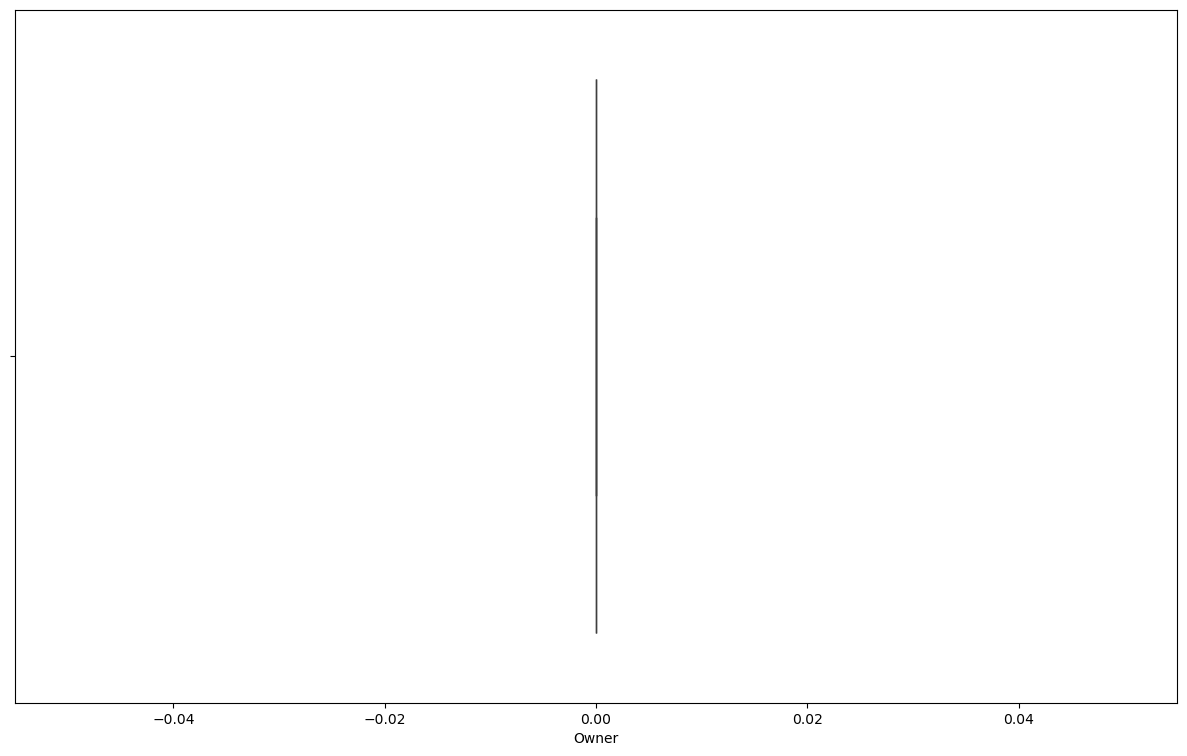

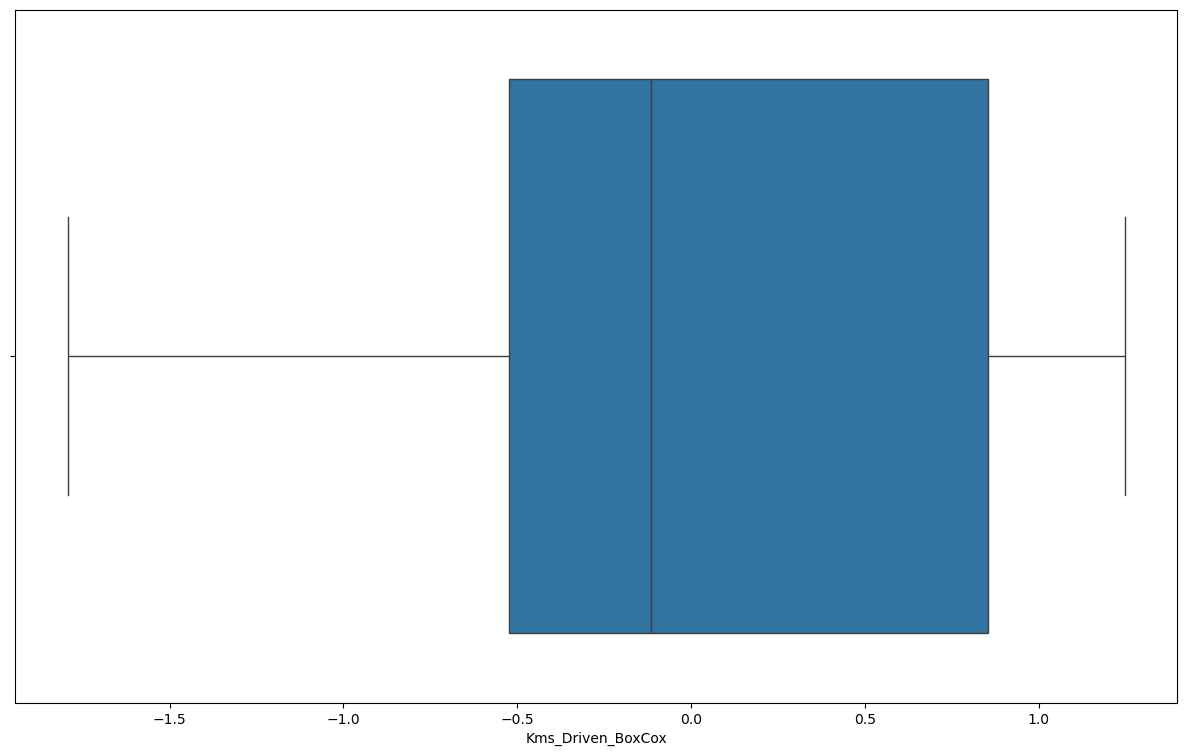

In [129]:
  num_columns= df.select_dtypes(include=['int64','float64']).columns 
for  column in  num_columns:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df[column])
    plt.show()

#### 3.4 Add python comments to explain the observations.

### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

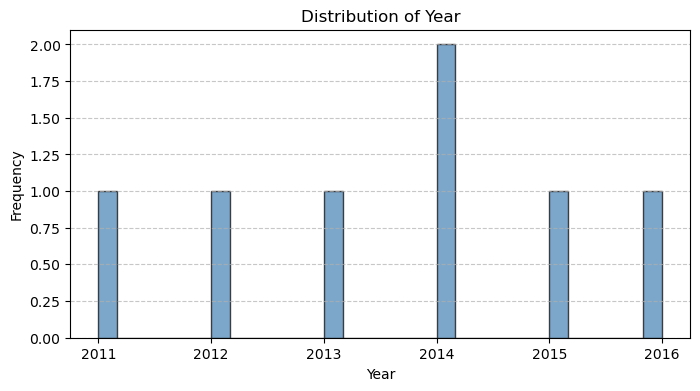

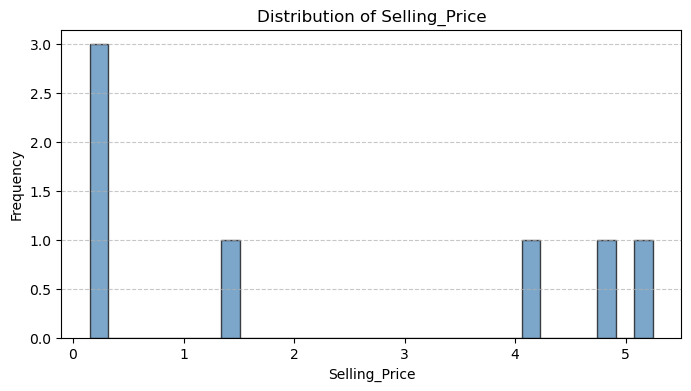

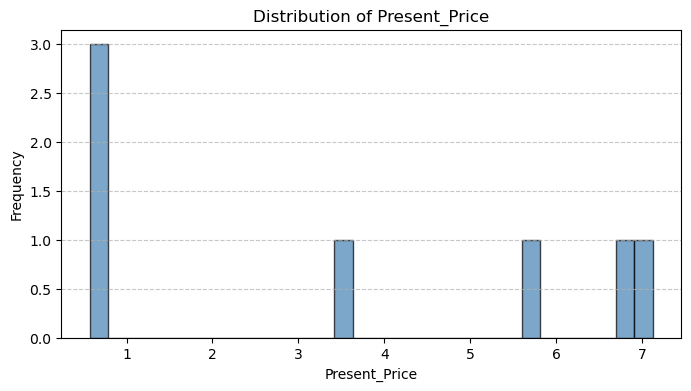

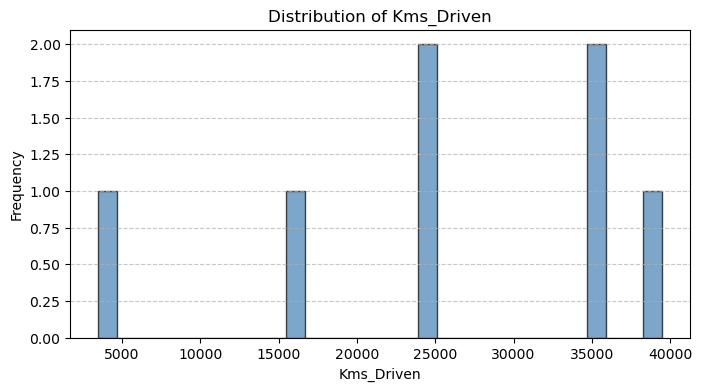

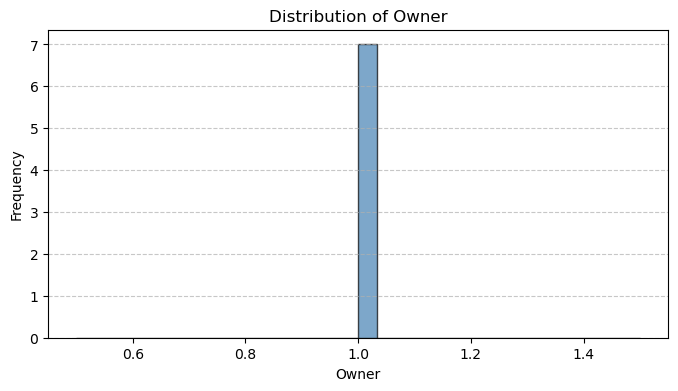

In [49]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [51]:
skew_value = df[num_columns].skew()

print(f'Skewness Dataset: {skew_value}')

Skewness Dataset: Year            -0.168964
Selling_Price    0.341606
Present_Price    0.106342
Kms_Driven      -0.809459
Owner            0.000000
dtype: float64


In [52]:
df[['Selling_Price', 'Present_Price', 'Kms_Driven']].skew()

Selling_Price    0.341606
Present_Price    0.106342
Kms_Driven      -0.809459
dtype: float64

In [53]:
print(df['Kms_Driven'].describe())
df['Kms_Driven'].value_counts()

count        7.000000
mean     25620.571429
std      12655.634237
min       3493.000000
25%      20250.000000
50%      25000.000000
75%      35433.000000
max      39485.000000
Name: Kms_Driven, dtype: float64


Kms_Driven
39485    1
16500    1
25000    1
24000    1
35000    1
3493     1
35866    1
Name: count, dtype: int64

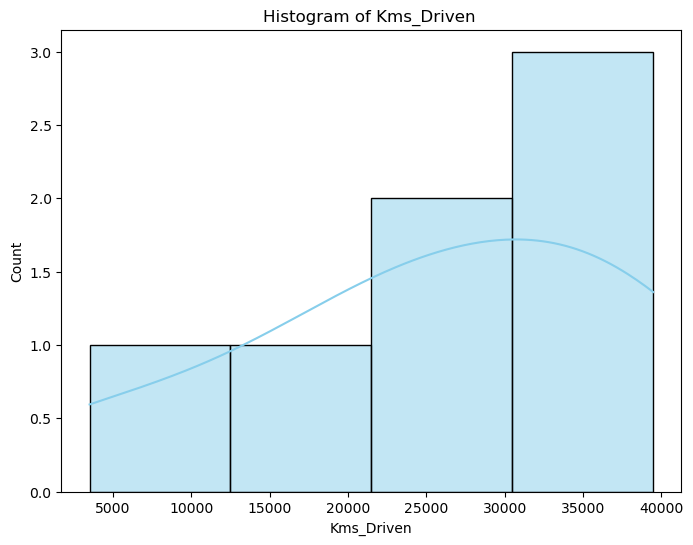

In [54]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Kms_Driven'], kde=True, color='skyblue')

plt.title('Histogram of Kms_Driven ')

plt.show()

In [55]:
from scipy import stats
import numpy as np


positive_kms = df['Kms_Driven'][df['Kms_Driven'] > 0]


transformed_kms, best_lambda = stats.boxcox(positive_kms)

print(f"Optimal lambda for Box-Cox: {best_lambda}")


df.loc[positive_kms.index, 'Kms_Driven_BoxCox'] = transformed_kms


print(f"Skewness before: {positive_kms.skew():.4f}")
print(f"Skewness after: {pd.Series(transformed_kms).skew():.4f}")



Optimal lambda for Box-Cox: 1.20682338721821
Skewness before: -0.8095
Skewness after: -0.5889


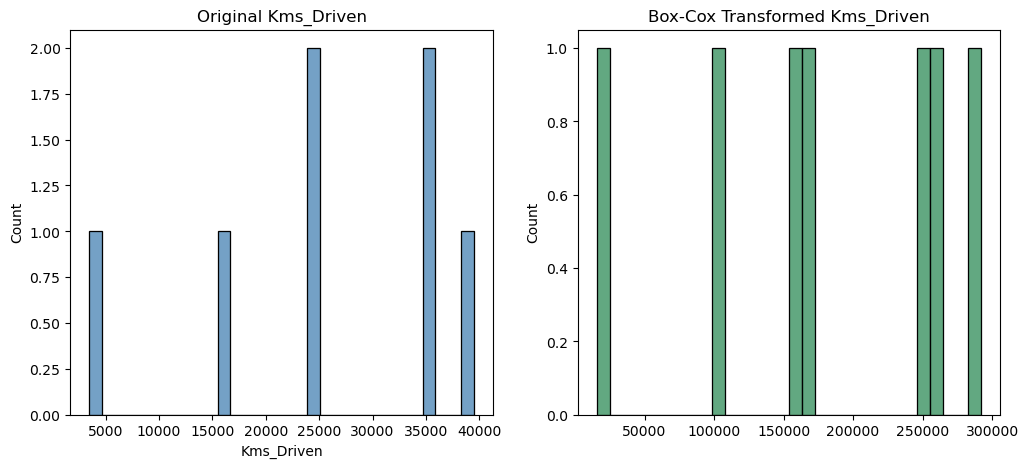

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(positive_kms, bins=30, ax=axes[0], color='steelblue')
axes[0].set_title('Original Kms_Driven')


sns.histplot(transformed_kms, bins=30, ax=axes[1], color='seagreen')
axes[1].set_title('Box-Cox Transformed Kms_Driven')

plt.show()


#### 4.3 Apply appropriate standardization method wherever applicable.

In [58]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numeric] = scaler.fit_transform(df[numeric])

print(df[numeric].head())


         Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
57   0.269408       0.844754       1.167138    1.183291    0.0   
104  0.269408      -0.435680      -0.036971   -0.778416    0.0   
189 -0.987829      -0.971135      -1.072145   -0.052964    0.0   
191 -0.359211      -0.971135      -1.043390   -0.138311    0.0   
196 -1.616448      -0.994415      -1.072145    0.800508    0.0   

     Kms_Driven_BoxCox  
57            1.247402  
104          -0.844294  
189          -0.114542  
191          -0.203499  
196           0.812375  


#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

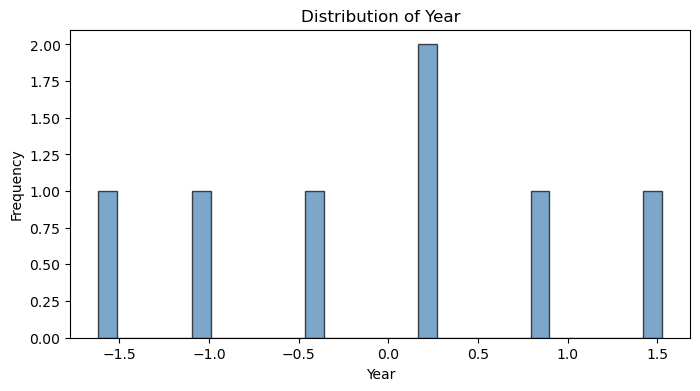

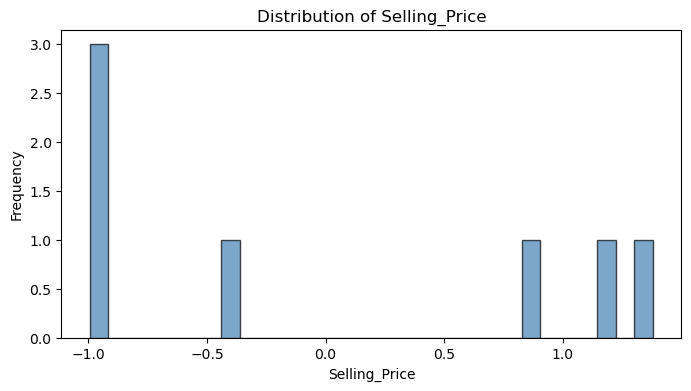

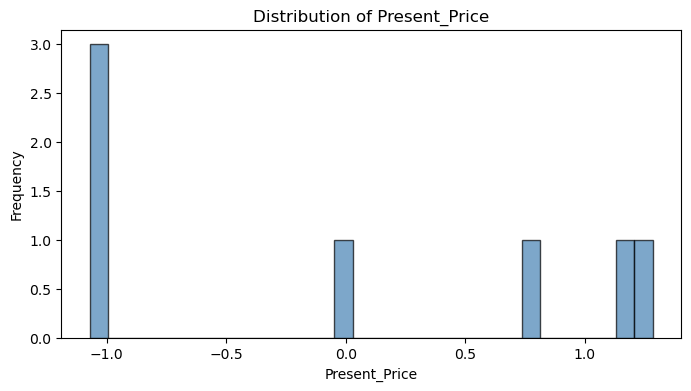

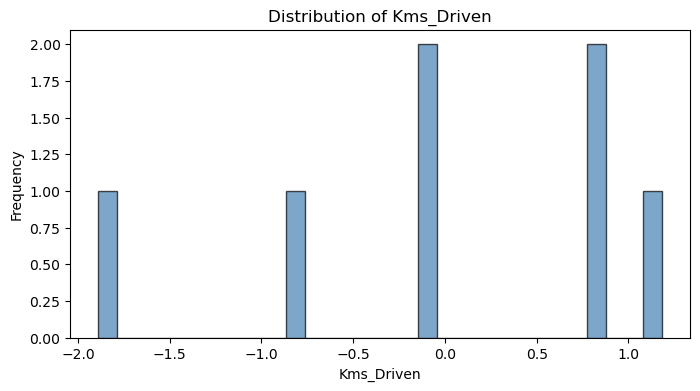

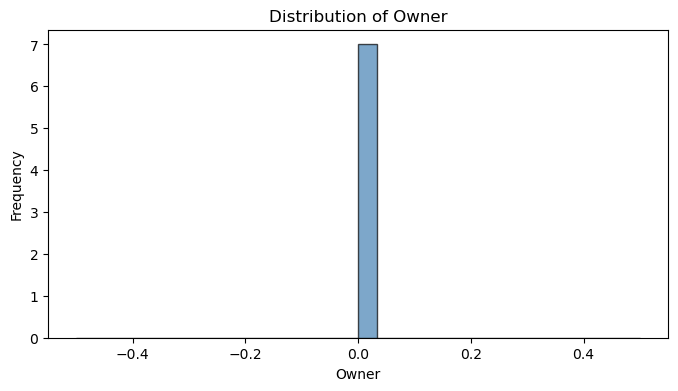

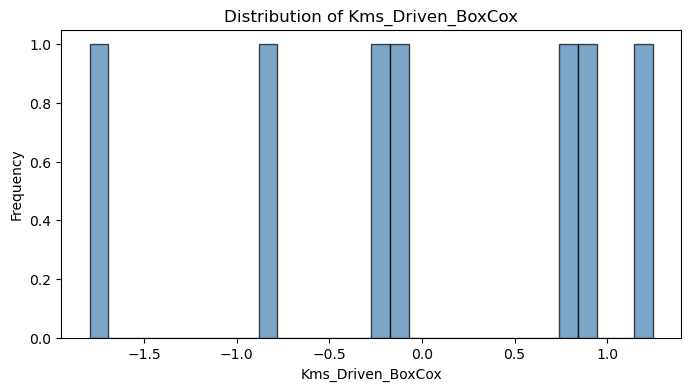

In [61]:

 import matplotlib.pyplot as plt

for column in numeric:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


#### 4.5 Encode categorical features

In [63]:
catf = df.select_dtypes(exclude ='number')
print(catf)

               Car_Name Fuel_Type Seller_Type Transmission
57              etios g    Petrol      Dealer       Manual
104      Hyosung GT250R    Petrol  Individual       Manual
189  Bajaj Discover 125    Petrol  Individual       Manual
191  Hero  Ignitor Disc    Petrol  Individual       Manual
196  Bajaj Discover 125    Petrol  Individual       Manual
203           grand i10    Petrol      Dealer       Manual
239               xcent    Petrol      Dealer       Manual


In [64]:
from sklearn.preprocessing import LabelEncoder 

In [65]:
encoder = LabelEncoder()
df['Car_Name'] = encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Kms_Driven_BoxCox
57,3,0.269408,0.844754,1.167138,1.183291,0,0,0,0.0,1.247402
104,2,0.269408,-0.435680,-0.036971,-0.778416,0,1,0,0.0,-0.844294
189,0,-0.987829,-0.971135,-1.072145,-0.052964,0,1,0,0.0,-0.114542
191,1,-0.359211,-0.971135,-1.043390,-0.138311,0,1,0,0.0,-0.203499
196,0,-1.616448,-0.994415,-1.072145,0.800508,0,1,0,0.0,0.812375
203,4,1.526645,1.380208,0.771759,-1.888527,0,0,0,0.0,-1.792962
239,5,0.898027,1.147402,1.285752,0.874419,0,0,0,0.0,0.895520


#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

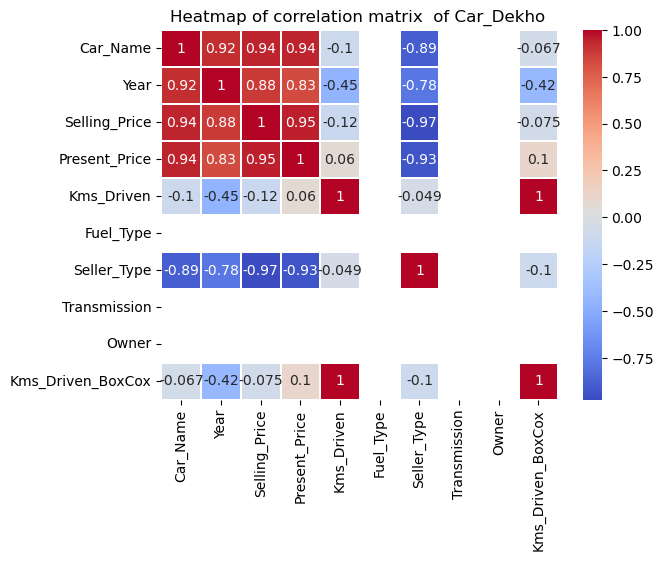

In [67]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.25)
plt.title("Heatmap of correlation matrix  of Car_Dekho ")
plt.show()


In [ ]:
 #There is high correlation with the km_driven box cox, the selling price, and the present price, showing a significant correlation between the km-driven and actual present price to affect the selling price 

#### 4.7 Provide detailed observations and conclusions.

### Section 5: Feature Selection 

#### 5.1 Use correlation result for feature selection.

In [71]:
corr_matrix = df.corr()
target_corr = corr_matrix['Selling_Price'].abs().sort_values(ascending=False)
print(target_corr)


Selling_Price        1.000000
Seller_Type          0.973518
Present_Price        0.951877
Car_Name             0.944700
Year                 0.880467
Kms_Driven           0.124972
Kms_Driven_BoxCox    0.074932
Fuel_Type                 NaN
Transmission              NaN
Owner                     NaN
Name: Selling_Price, dtype: float64


In [72]:
relevant_features = target_corr[target_corr > 0.3].index.drop('Selling_Price')


In [73]:
def remove_highly_correlated_features(df, threshold=0.85):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return to_drop

features_to_drop = remove_highly_correlated_features(df[relevant_features])
selected_features = relevant_features.drop(features_to_drop)
print("Selected features after removing high correlation:", selected_features)


Selected features after removing high correlation: Index(['Seller_Type'], dtype='object')


In [74]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Kms_Driven_BoxCox'],
      dtype='object')

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine X_train and y_train for correlation calculation
train_data = X_train.copy()
train_data['Selling_Price'] = y_train

# Step 1: Select features strongly correlated with target
threshold_target_corr = 0.3
corr_with_target = train_data.corr()['Selling_Price'].abs()
selected_features = corr_with_target[corr_with_target > threshold_target_corr].index.drop('Selling_Price').tolist()

print("Features correlated with target (train set):", selected_features)

# Step 2: Remove highly correlated features among the selected features

def remove_highly_correlated_features(df, threshold=0.85):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]
    return to_drop

# Subset train data with selected features
selected_train_data = X_train[selected_features]

# Find features to drop due to high correlation
features_to_drop = remove_highly_correlated_features(selected_train_data, threshold=0.85)

# Final features after dropping highly correlated ones
final_features = [feat for feat in selected_features if feat not in features_to_drop]

print("Final features after removing high correlation (train set):", final_features)

# Select these features for train and test sets
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]


Features correlated with target (train set): ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Seller_Type', 'Kms_Driven_BoxCox']
Final features after removing high correlation (train set): ['Car_Name', 'Kms_Driven']


#### 5.2 Select the features according to the K highest score. 

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split into features and target
X = df.drop('Selling_Price', axis=1)  # Replace 'target' with your actual target column name
y = df['Selling_Price']

# Split into train and test sets (important: feature selection only on train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine features and target in training data to calculate correlation
train_data = X_train.copy()
train_data['Selling_Price'] = y_train

# Calculate absolute correlation of features with the target
corr_with_target = train_data.corr()['Selling_Price'].abs().drop('Selling_Price')

# Select the top K features with highest correlation scores
K = 10 # number of features to select
top_k_features = corr_with_target.nlargest(K).index.tolist()

print(f"Top {K} features correlated with target:")
print(top_k_features)

# Use these features in your train and test sets
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]


Top 10 features correlated with target:
['Seller_Type', 'Present_Price', 'Car_Name', 'Year', 'Kms_Driven_BoxCox', 'Kms_Driven', 'Fuel_Type', 'Transmission', 'Owner']


#### 5.3 Provide detailed insights about the selected features.

In [ ]:
# There is a strong correlation relationship  between seller tpe , km-driveboxcox and the present_price 